# Sommaire :

**Partie 1 : Importation et desciption du jeu de données**
 - <a href="#C1">Importation et desciption des données</a>
     - <a href="#C11">1.1 - Fichier EdStatsCountry.csv</a>
     - <a href="#C12">1.2 - Fichier EdStatsSeries.csv</a>
     - <a href="#C13">1.3 - Fichier EdStatsData.csv</a>     
     - <a href="#C14">1.4 - Fichier EdStatsCountry-Series.csv</a>  
     - <a href="#C15">1.5 - Fichier EdStatsFootNote.csv</a>  
 
**Partie 2 : Nettoyez un jeu de données**
 - <a href="#C2">Nettoyez votre jeu de données</a>
     - <a href="#C21">2.1 - Fichier EdStatsCountry.csv</a>
     - <a href="#C22">2.2 - Fichier EdStatsSeries.csv</a>
     - <a href="#C23">2.3 - Fichier EdStatsData.csv</a>     
     - <a href="#C24">2.4 - Fichier EdStatsCountry-Series.csv</a>  
     - <a href="#C25">2.5 - Fichier EdStatsFootNote.csv</a>  
 
**Partie 3 : Représentez vos variables**
 - <a href="#C3">3.1 - Recherche informations pertinentes</a>
 - <a href="#C4">Présentez une variable sous forme de tableau</a>
 - <a href="#C5">Découvrez les mesures de tendance centrale</a>
 - <a href="#C6">Comprenez les mesures de dispersion</a>
 - <a href="#C7">Appréhendez les mesures de forme</a>
 - <a href="#C8">Familiarisez-vous avec les mesures de concentration</a>
 
**Partie 4 : Réalisez une analyse bivariée**
 - <a href="#C9">Analysez la corrélation entre deux variables quantitatives</a>
 - <a href="#C101">Analysez deux variables quantitatives par régression linéaire</a>
 - <a href="#C111">Analysez une variable quantitative et une qualitative par ANOVA</a>
 - <a href="#C121">Analysez deux variables qualitatives avec le Chi-2</a>

# <a name="C1">1 - Importation et desciption des données</a>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

Nous pouvons à présent charger le jeu de données, dans un dataframe que nous nommerons ici `Country` provanant du fichier EdStatsCountry.csv. Nous affichons ensuite les 5 premières lignes.

In [202]:
## FONCTION Qui compte les valuers nulles 
def AffNull (inf_df):
    a = inf_df.T['null'].sum()
    b = inf_df.T['count'].sum()
    print("Nombre valeurs 'null' : {:.0f}".format(a))
    print("Nombre valeurs non 'null' : {:.0f}".format(b))
    print("Nombre total cases : {:.0f}".format(a+b))
    print("% total valeurs 'null' : {:.1f}%".format(a*100/(a+b)))
    
## FONCTION SORTANT UN DATAFRAME D'INFOS (complémentaire du describe)
def infoDF (df):
    nb_li = df.index.size
    nb_col = df.columns.size
    tot = nb_li*nb_col    
    infos = pd.DataFrame(df.dtypes).T.rename(index={0:'Type'}) 
    infos = infos.append(pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}))
    return infos  
## FONCTION D'affichage d'un graphique 
def GraphA(plot_type, my_plot, my_x, my_y, my_x_t, xlab, ylab, my_tit, num_col):
    if plot_type == "plot" :
        my_plot.plot(my_x, my_y, '-o', color = colors[num_col])
    elif plot_type == "bar" :
        my_plot.bar(my_x, my_y, color = colors[num_col])
    else :
        print("erreur type de graphe")
    my_plot.set_xlabel(xlab, fontsize = 14)
    my_plot.set_ylabel(ylab, fontsize = 14)
    plt.xticks(my_x_t, my_x_t, rotation=85 , fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.ylim(round(min(my_y)*0.9), round(max(my_y)*1.1)) 
    my_plot.set_title(my_tit, fontsize = 18, fontweight = 'bold')
    plt.grid(color='grey', linestyle='dotted')
    

# <a name="C11">1.1 - EdStatsCountry.csv</a>

In [94]:
Country = pd.read_csv('EdStatsCountry.csv')
Country.head(10)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,AE,U.A.E. dirham,April 2013 database update: Based on data from...,Middle East & North Africa,High income: nonOECD,AE,...,General Data Dissemination System (GDDS),2010,NaN,NaN,NaN,2012,NaN,2011.0,2005,NaN
7,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,AR,...,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002.0,2012.0,2000,NaN
8,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,NaN,Europe & Central Asia,Lower middle income,AM,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2010","Integrated household survey (IHS), 2012",Yes,2013/14,NaN,2012.0,2007,NaN
9,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN,NaN


In [30]:
Country.shape

(241, 32)

Comme vous pouvez le voir via la commande ci dessus, nous avons 241 transactions, renseignées sur 32 variables différentes. Nous avons notamment : 
- Country Code : code du pays
- Short Name : libellé court du pays
- Table Name :Nom du pays
- Long Name : libellé long du pays
- Income Group : Groupe de revenu

<font color='darkred'>**</font>

In [111]:
areas = ['Arab World',
         'East Asia & Pacific',
         'East Asia & Pacific (excluding high income)',
         'East Asia & Pacific (developing only)',
         'East Asia & Pacific (all income levels)',
         'Euro area',
         'European Union'
         'Europe & Centraµl Asia',
         'Europe & Central Asia (excluding high income)',
         'Europe & Central Asia (developing only)',
         'Europe & Central Asia (all income levels)',
         'European Union',
         'Heavily indebted poor countries (HIPC)',
         'High income',
         'Latin America & Caribbean',
         'Latin America & Caribbean (developing only)',
         'Latin America & Caribbean (excluding high income)',
         'Least developed countries: UN classification',
         'Low & middle income',
         'Low income',
         'Lower middle income',
         'Middle East & North Africa',
         'Middle East & North Africa (excluding high income)',
         'Middle East & North Africa (all income levels)',
         'Middle East & North Africa (developing only)',
         'Middle income',
         'North America',
         'OECD members',
         'South Asia',
         'Sub-Saharan Africa',
         'Sub-Saharan Africa (excluding high income)',
         'Upper middle income',
         'World',
        ]

In [133]:
#country.groupby['Region','Short Name'].unique()
country.groupby('Region')[['Short Name']].unique().tolist()

AttributeError: 'DataFrameGroupBy' object has no attribute 'unique'

In [112]:
country[~country['Short Name'].isin(areas)]['Short Name'].unique().shape

(219,)

In [113]:
list_countries = country[~country['Short Name'].isin(areas)]['Short Name'].unique().tolist()
print(list_countries)

['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Micronesia', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Gibraltar', 'Guinea', 'The Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greec

Une fois que l'on modifie la liste avec les indicateurs par zones, on obtient 219 pays. On voit que certains pays sont en fait des subdivisions d'autres pays. Comme par exemple : St Martin, Isle of Man, Polynésie Française, etc.

In [114]:
country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

EdStatsCountry.csv contient des informations globales sur l'économie de chaque pays du monde ainsi qu'un classement par région de chaque pays. D'autres informations concernent aussi des groupes de pays par région ou niveau de revenu


Nombre de pays par région:

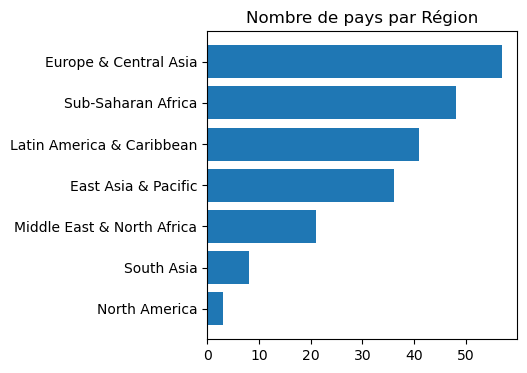

In [126]:
plt.figure(figsize=(4,4))
#sns.barplot(x= country.groupby('Region')[['Short Name']].count()['Short Name'].sort_values(), y = country.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Region'])
plt.barh(y = country.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Region'], width = country.groupby('Region')[['Short Name']].count()['Short Name'].sort_values())
plt.title('Nombre de pays par Région')
plt.show()

# <a name="C12">1.2 - EdStatsSeries.csv</a>

In [75]:
Series = pd.read_csv('EdStatsSeries.csv')
Series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
Series.shape

(3665, 21)

Comme vous pouvez le voir via la commande ci dessus, nous avons 3665 transactions, renseignées sur 21 variables différentes. Nous avons notamment : 
- Series Code : code de la serie
- Topic : montant de l'opération
- Indicatior Name : 
- Definition : 

<font color='darkred'>*vous n'aurez probablement pas besoin de la dernière colonne Unnamed: 20*</font>

# <a name="C13">1.3 - EdStatsData.csv</a>

In [68]:
Data = pd.read_csv("EdStatsData.csv")
Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
Data.shape

(886930, 70)

On vérifie qu'on a le même nombre d'indicateurs dans les 2 datasets

In [124]:
Series['Series Code'].nunique() == data['Indicator Code'].nunique()

True

Comme vous pouvez le voir via la commande ci dessus, nous avons 886930 transactions, renseignées sur 70 variables différentes. Nous avons notamment : 
- Country Name : Nom du pays
- Country Code : Code du pays

<font color='darkred'>*vous n'aurez probablement pas besoin de la dernière colonne Unnamed: 69* et de toutes ses variables</font>

Combien y-a-t-il d'indicateurs par pays?

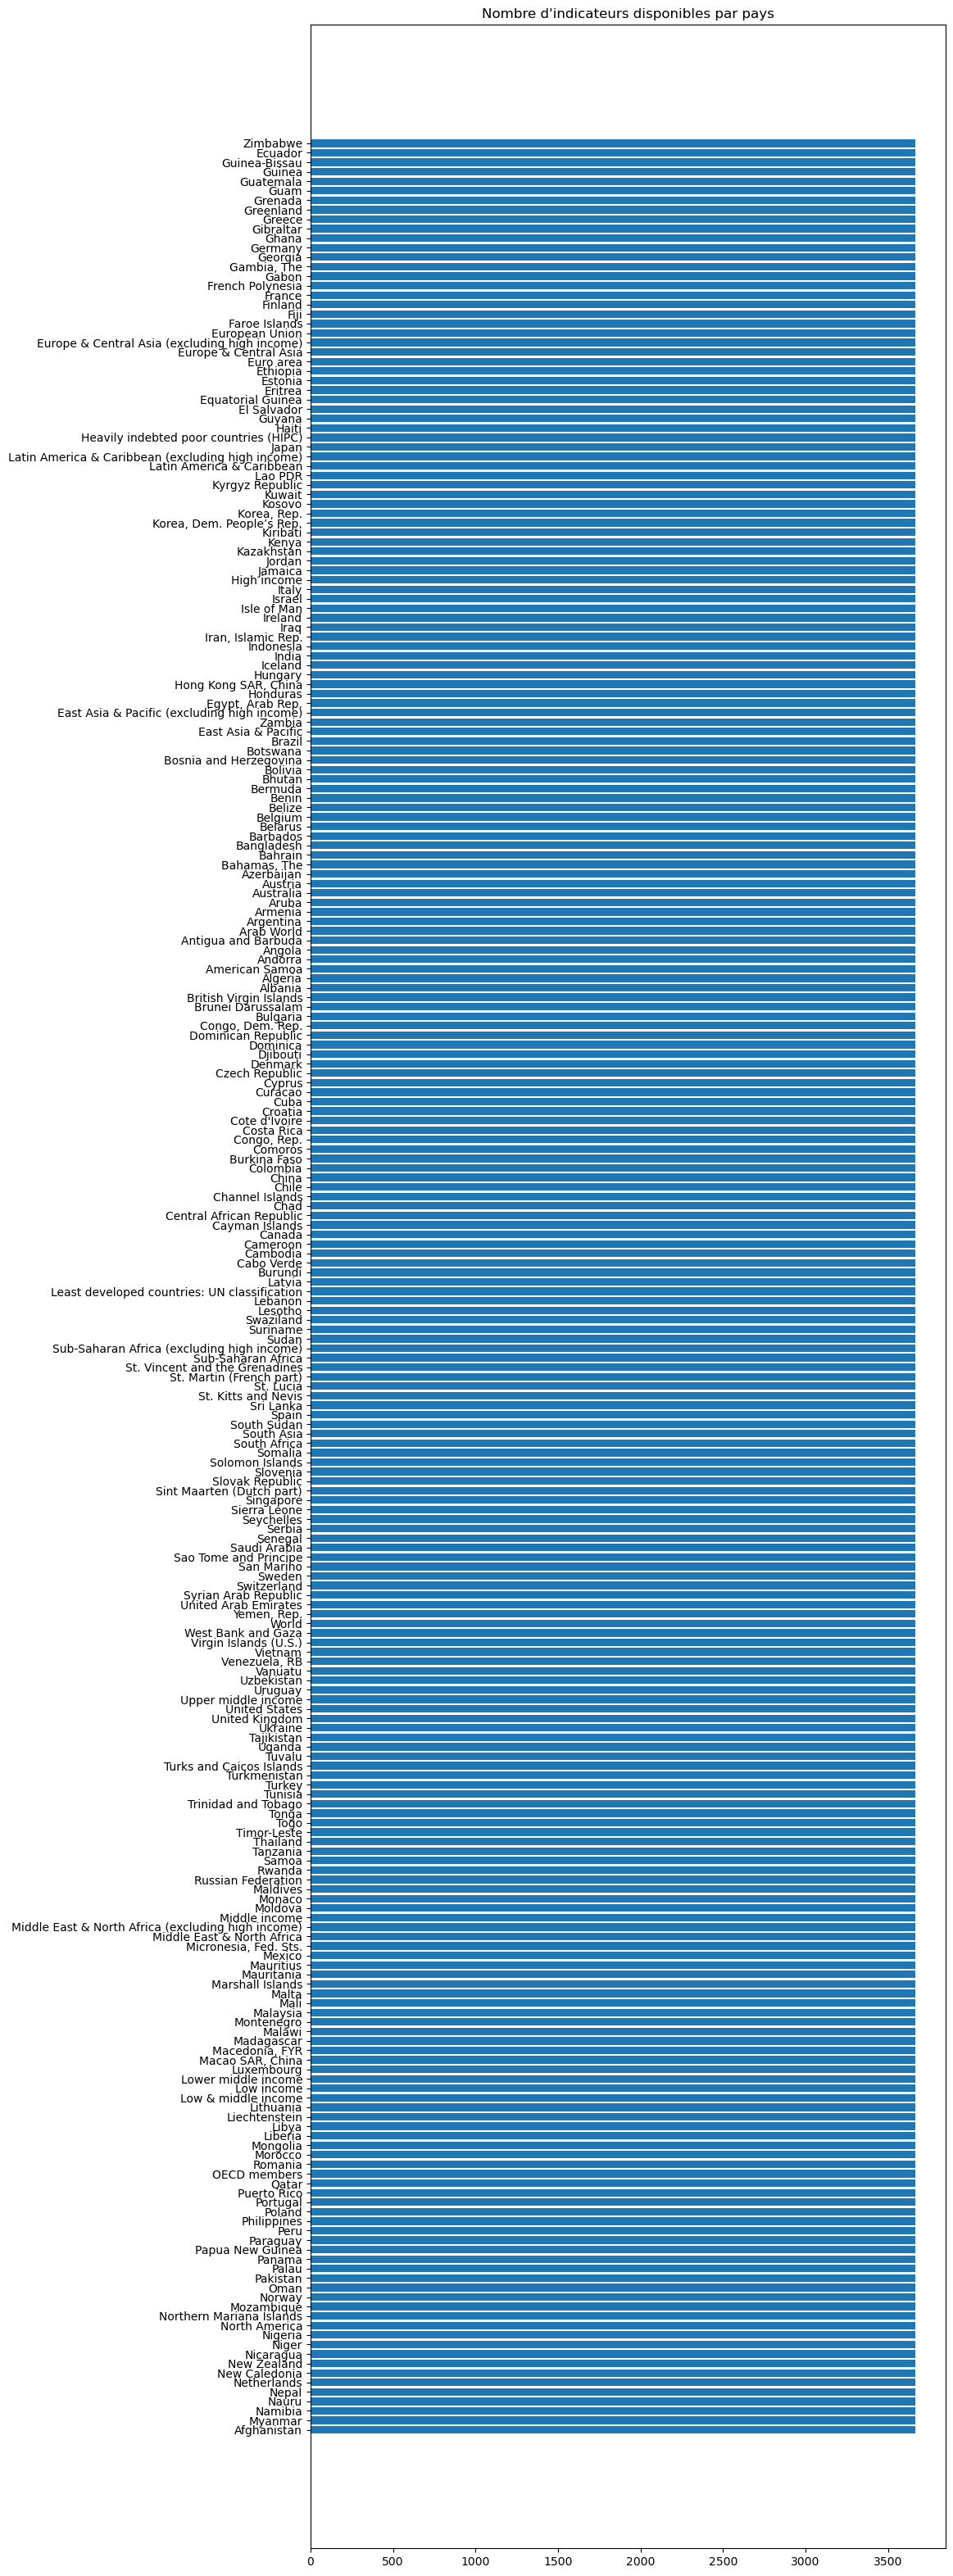

In [127]:
plt.figure(figsize=(10,40))
plt.barh(y = data.groupby('Country Name')[['Indicator Code']].count().reset_index().sort_values(by='Indicator Code')['Country Name'], 
         width =  data.groupby('Country Name')[['Indicator Code']].count().reset_index().sort_values(by='Indicator Code')['Indicator Code'])
plt.title('Nombre d\'indicateurs disponibles par pays')
plt.show()

# <a name="C14">1.4 - EdStatsCountry-Series.csv</a>

In [79]:
Countryseries = pd.read_csv("EdStatsCountry-Series.csv")
Countryseries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [80]:
Countryseries.shape

(613, 4)

Comme vous pouvez le voir via la commande ci dessus, nous avons 613 transactions, renseignées sur 4 variables différentes. Nous avons notamment : 
- CountryCode : Code du pays
- SeriesCode : code de la serie
- Description : Description des sources du pays

<font color='darkred'>*vous n'aurez probablement pas besoin de la dernière colonne Unnamed: 3* et de toutes ses variables</font>

In [81]:
Countryseries['CountryCode'].nunique()

211

On ne retrouve pas le même nombre de pays dans countryseries que dans country. Quels sont les pays qui diffèrent?

# <a name="C15">1.5 - EdStatsFootNote.csv</a>

In [149]:
Footnote = pd.read_csv("EdStatsFootNote.csv")
Footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [85]:
Footnote.shape

(643638, 5)

In [86]:
Footnote['CountryCode'].nunique()

239

In [150]:
#On supprime les caracteres dans la colonne Year
Footnote['Year'] = Footnote['Year'].apply(lambda x : x[2:])
Footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,2006,Country estimation.,NaN


Comme vous pouvez le voir via la commande ci dessus, nous avons 643638 transactions, renseignées sur 5 variables différentes. Nous avons notamment : 
- CountryCode : Code du pays
- SeriesCode : code de la serie
- Year : année 
- Description : Description des sources du pays

<font color='darkred'>*vous n'aurez probablement pas besoin de la dernière colonne Unnamed: 4* et de toutes ses variables</font>

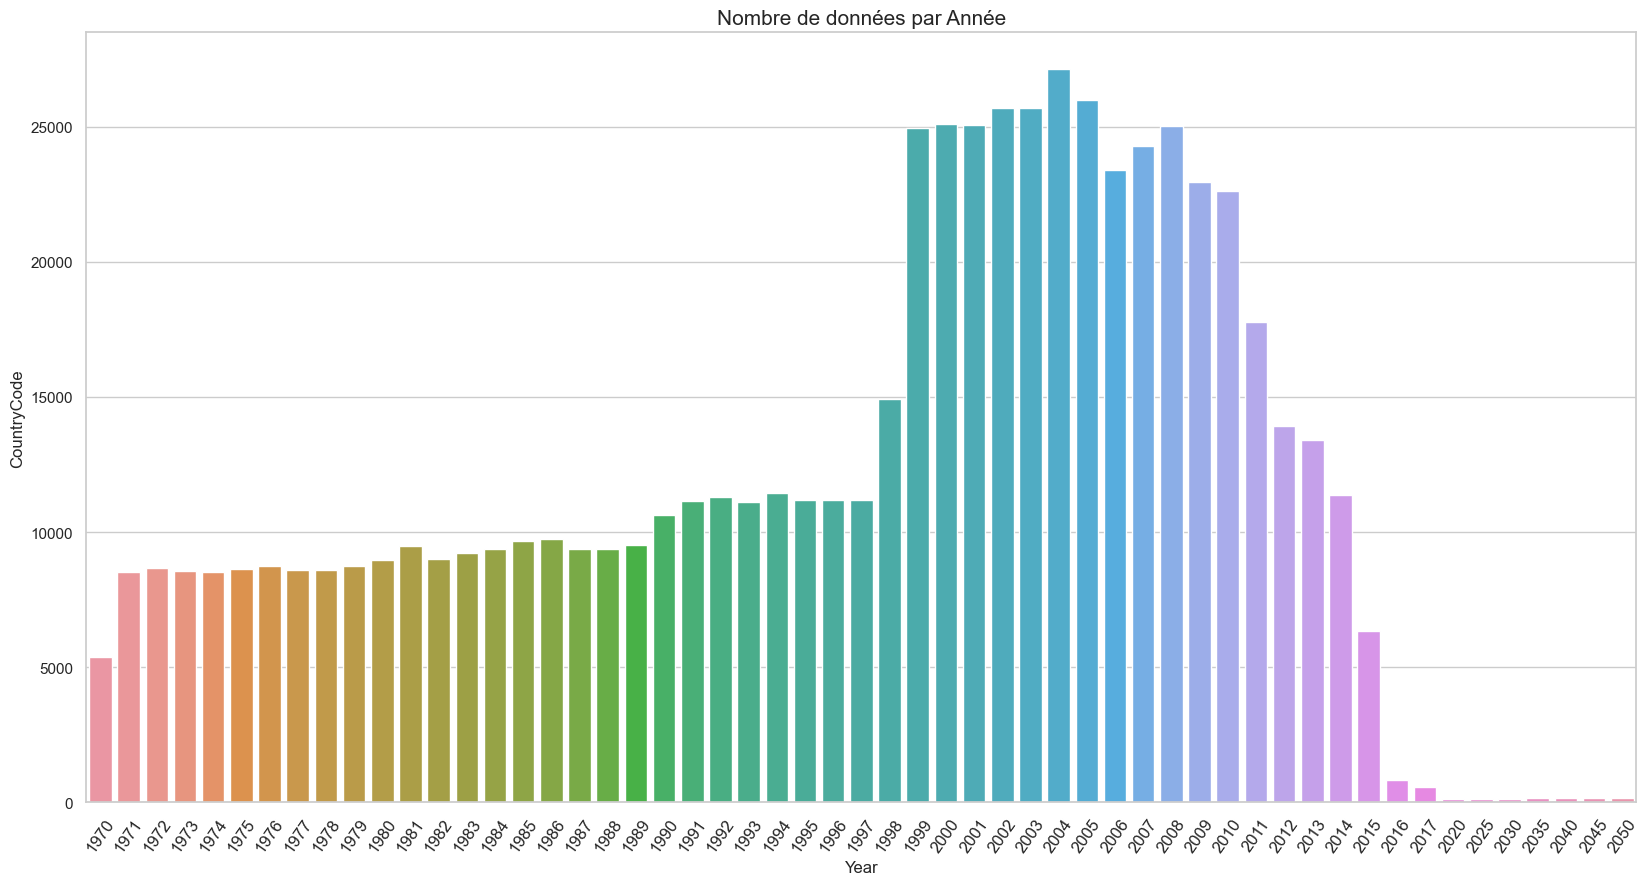

In [151]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
plt.title('Nombre de données par Année', size=15)
plot = sns.barplot(y = 'CountryCode', x='Year', data = Footnote.groupby('Year').count().reset_index())
plot.set_xticklabels(labels = Footnote.groupby('Year').count().reset_index()['Year'], rotation=55, size=12)
#sns.barplot(x=[elem1 for elem1, elem2 in mots_indicateurs_populaires], y=[elem2 for elem1, elem2 in mots_indicateurs_populaires], hue = 'mots')
plt.show()

# <a name="C2">2 - Nettoyez votre jeu de données</a>

Il est à présent temps de vérifier le jeu de données.


In [118]:
# on crée d'autres dataframes à modifier (deep copies)
data_c = Data.copy()
country_c = Country.copy()
series_c = Series.copy()
country_series_c = Countryseries.copy()
footnote_c = Footnote.copy()

# <a name="C21">   2.1 - EdStatsCountry.csv</a>



### 2.1.1 Valeurs manquantes

On va ensuite vérifier si notre jeu de données contient des valeurs manquantes :

In [88]:
country_c.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [89]:
# pour afficher uniquement les variables qui ont des valeurs manquantes
nb_na = country_c.isnull().sum()
nb_na[nb_na>0]

2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                                       96
Balance of Payments Manual in use                     60
External debt Reporting status                       117
System of trade                                       41
Government Accounting concept  

On observe que notre jeu de données contient beaucoup de valeurs manquantes. 

Par manque d'informations, on devrait supprimer ici la colonne "Unnamed: 31".

In [106]:
# Remove column name 'Unnamed: 31'
country_c = country_c.drop(['Unnamed: 31'], axis=1)

### 2.1.2 Doublons 


In [107]:
#data.loc[data[['date_operation', 'libelle', 'montant', 'solde_avt_ope']].duplicated(keep=False),:]
country_c.duplicated().sum()

0

In [14]:
#On a ici une opération qui est complètement en double. Il suffit donc de supprimer l'une des deux via le drop_duplicate
#data.drop_duplicates(subset=['date_operation', 'libelle', 'montant', 'solde_avt_ope'], inplace=True, ignore_index=True)

### 4. Détection d'outliers :

Un describe peut potentiellement nous aider dans un premier temps :

In [115]:
country_c.describe()

,National accounts reference year,Latest industrial data,Latest trade data
count,32.00000,107.000000,185.000000
mean,2001.53125,2008.102804,2010.994595
std,5.24856,2.616834,2.569675
min,1987.00000,2000.000000,1995.000000
25%,1996.75000,2007.500000,2011.000000
50%,2002.00000,2009.000000,2012.000000
75%,2005.00000,2010.000000,2012.000000
max,2012.00000,2010.000000,2012.000000


Une bonne première approche en attendant d'avoir des outils plus adéquats, est de regarder le maximum et le minimum. Cela donne généralement un premier apperçu de ce qui pourrait clocher à ce niveau. 

In [109]:
#i = data.loc[data['montant']==-15000,:].index[0] # récupération de l'index de la transaction à -15000
#data.iloc[i-1:i+2,:] # on regarde la transaction précédente et la suivante

In [17]:
#data.loc[data['montant']==-15000, 'montant'] = -14.39

# <a name="C23">   2.3 - EdStatsData.csv</a>

In [205]:
# Remove column name 'Unnamed: 69'
data_c = data_c.drop(['Unnamed: 69'], axis=1)

# <a name="C25">   2.5 - EdStatsFootNote.csv</a>

### 2.5.1 Valeurs manquantes

In [ ]:
# Remove column name 'Unnamed: 4'
footnote.drop(['Unnamed: 4'], axis=1, inplace=True)

In [122]:
import inspect
def retrieve_name(var):
    '''afficher le nom d\'une variable '''
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]
list_dataset = [country_c, country_series_c, data_c, footnote_c, series_c]
for dataset in list_dataset:
    print('Le dataframe {} possède {} lignes et {} colonnes.'.format(retrieve_name(dataset)[0], dataset.shape[0], dataset.shape[1]))

Le dataframe country_c possède 241 lignes et 32 colonnes.
Le dataframe country_series_c possède 613 lignes et 4 colonnes.
Le dataframe data_c possède 886930 lignes et 70 colonnes.
Le dataframe footnote_c possède 643638 lignes et 5 colonnes.
Le dataframe series_c possède 3665 lignes et 21 colonnes.


**Bilan sur le contenu de chaque fichier:**
* Country : EdStatsCountry.csv contient des informations globales sur l'économie de chaque pays du monde
    certaines valeurs manquent pour de nombreux pays, parfois la majorité des pays. Aucun doublon.
    La table "Country" est composée de 32 colonnes et 241 lignes correspondant aux pays sur lesquels portent les données. (Il manque un pays). Chaque colonne donne des renseignements sur les pays.
    
    
* Country Series : EdStatsCountry-Series.csv contient la source des données des informations contenues dans EdStatsCountry.csv. Les valeurs manquantes correspondent à la colonne "Unnamed: 3" qui est vide en intégralité et peut donc être supprimée sans perte d'information. Aucun doublon.
    La table "Country-series" comporte 4 colonnes et 613 lignes 
    

* Data :  EdStatsData.csv donne l'évolution de plusieurs indicateurs pour tous les pays du monde et macro régions du monde: 
    Beaucoup de valeurs manquantes, dans le même ordre de grandeur pour toutes les années, il y a potentiellement certains indicateurs pour lesquels des données manquent. on remarque qu'il y a exactement le même nombre de valeurs manquantes pour les années >= 2020. Aucun doublon.
    
    
    La table "Data" est composée de 70 colonnes et 886930 lignes qui correspondent à toutes les combinaisons des entrées uniques des colonnes    "Country Code" et "Indicator Code" (respectivement 242 et 3665 entrées uniques). On trouve dans chaque ligne correspondant à un couple Indicateur/Pays la valeur d'un indicateur pour un pays. Les colonnes détaillent les valeurs pour chaque année de 1970 à 2017 (48 colonnes), puis des projections de ces valeurs tous les 5 ans des années 2020 à 2100 (17 colonnes).
    

* Footnote :  footnote donne des informations sur année d'origine des données et description des données
    les valeurs manquantes correspondent à la colonne "Unnamed:4" qui est vide en intégralité et peut donc être supprimée sans perte d'information. Aucun doublon
    La table "FootNote" comporte 5 colonnes et 643638 lignes.
    
    
* Series :  Series donne des données descriptives sur les indicateurs socio économiques disponibles dans data. Aucun doublon
    La table "Series" est composée de 21 colonnes et 3665 lignes correspondant chacune à un indicateur statistique.
    

# <a name="C3"> 3.1 - Recherche informations pertinentes</a>


In [206]:
inf_data = infoDF(data_c).append(data_c.describe(include='all'))
AffNull(inf_data)
inf_data


C:\Users\Zbook\AppData\Local\Temp\ipykernel_18356\618210995.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  infos = infos.append(pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}))


Nombre valeurs 'null' : 52568249
Nombre valeurs non 'null' : 8629921
Nombre total cases : 61198170
% total valeurs 'null' : 85.9%


C:\Users\Zbook\AppData\Local\Temp\ipykernel_18356\131112356.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inf_data = infoDF(data_c).append(data_c.describe(include='all'))


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Type,object,object,object,object,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null,0,0,0,0,814642,851393,851311,851385,851200,799624,...,835494,835494,835494,835494,835494,835494,835494,835494,835494,835494
count,886930,886930,886930,886930,72288.0,35537.0,35619.0,35545.0,35730.0,87306.0,...,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0,51436.0
unique,242,242,3665,3665,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3665,3665,242,242,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1974772449.585505,4253638470.18787,4592364905.25697,5105005610.888861,5401492903.409988,2314287511.569427,...,714.578833,722.486797,727.128999,728.377864,726.648407,722.832705,717.68987,711.307183,703.42738,694.029624
std,NaN,NaN,NaN,NaN,121168685352.022415,180481446225.21524,191408271479.830597,205917043980.677643,211214985371.102539,137505922744.808807,...,21368.512459,22158.448875,22879.90321,23523.381836,24081.489234,24558.97175,24965.865778,25301.826635,25560.691226,25741.892898
min,NaN,NaN,NaN,NaN,-1.435564,-1.594625,-3.056522,-4.032582,-4.213563,-3.658569,...,-1.83,-1.63,-1.44,-1.26,-1.09,-0.92,-0.78,-0.65,-0.55,-0.45
25%,NaN,NaN,NaN,NaN,0.89,8.85321,9.24092,9.5952,9.861595,1.4,...,0.03,0.03,0.03,0.02,0.02,0.01,0.01,0.01,0.01,0.01


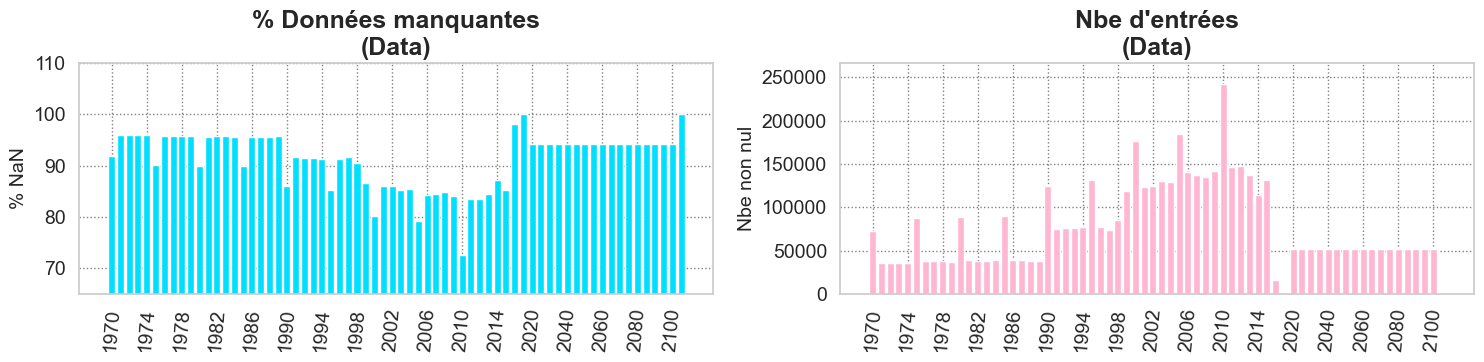

In [201]:

fig = plt.figure(figsize = (18,3))

#colors = ["#bd5db0","#70a845","#727bcc","#b49242","#cc566c","#4aad92","#ca6037"]
colors = ["#00DFFF","#FFB6D1","#727bcc","#b49242","#cc566c","#4aad92","#00000"]

li_annees = inf_data.columns[4:]
#print(li_annees)
x=li_annees
xlab=[my_str[:11]+"..." if len(my_str)>11 else my_str for my_str in x]
y1=inf_data[li_annees].loc["null"]*100/data_c.shape[0] # % de valeurs nulles
y2=inf_data[li_annees].loc["count"] # nombre de valeurs

plot1 = plt.subplot(1,2,1)
GraphA("bar", plot1, xlab, y1, xlab[::4], "", "% NaN",  "% Données manquantes\n(Data)", 0)

plot2 = plt.subplot(1,2,2)
GraphA("bar", plot2, xlab, y2, xlab[::4], "", "Nbe non nul",  "Nbe d'entrées\n(Data)", 1)

plt.show()

In [213]:
inf_country = infoDF(country_c).append(country_c.describe(include='all'))
AffNull(inf_country)
inf_country


Nombre valeurs 'null' : 2354
Nombre valeurs non 'null' : 5358
Nombre total cases : 7712
% total valeurs 'null' : 30.5%


C:\Users\Zbook\AppData\Local\Temp\ipykernel_18356\618210995.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  infos = infos.append(pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}))
C:\Users\Zbook\AppData\Local\Temp\ipykernel_18356\4121409111.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inf_country = infoDF(country_c).append(country_c.describe(include='all'))


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
Type,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,float64,float64,object,float64
null,0,0,0,0,3,26,96,27,27,1,...,60,28,100,81,130,99,134,56,62,241
count,241,241,241,241,238,215,145,214,214,240,...,181,213,141,160,111,142,107.0,185.0,179,0.0
unique,241,241,241,241,238,152,131,7,5,240,...,2,27,60,75,2,35,NaN,NaN,20,NaN
top,ABW,Aruba,Aruba,Aruba,AW,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,AW,...,General Data Dissemination System (GDDS),2011,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",Yes,2010,NaN,NaN,2000,NaN
freq,1,1,1,1,1,23,6,57,55,1,...,110,59,10,15,110,36,NaN,NaN,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2008.102804,2010.994595,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.616834,2.569675,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,1995.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2007.5,2011.0,NaN,NaN


In [210]:
# nbe de remplissage minimum/maximum et année correspondante
sel_data = inf_data.loc["count"][4:]
val_min = sel_data.min()
val_max = sel_data.max()

print("- Année nbe entrées min, nbe entrées min : \n{}, \n{:.0f}, soit {:.3f}%"\
      .format(sel_data.index[sel_data==val_min], \
              val_min, val_min*100/(data_c.shape[0])))

print("- année nbe entrées max, nbe entrées max : \n{}, \n{:.0f}, soit {:.3f}%"\
     .format(sel_data.index[sel_data==val_max], \
             val_max, val_max*100/(data_c.shape[0])))

- Année nbe entrées min, nbe entrées min : 
Index(['2017'], dtype='object'), 
143, soit 0.016%
- année nbe entrées max, nbe entrées max : 
Index(['2010'], dtype='object'), 
242442, soit 27.335%


- La table "Data" comporte environ 86 % de données non renseignées.
- L'association Indicateur/Pays a 60% de valeur non renseignée.
- L'année la mieux renseignée est l'année 2010 (27% des couples Indicateur/Pays, soit plus de 242 000 valeurs), et les moins renseignées sont les années 2016 et 2017 (respectivement 1,8% et 0,016% des couples, soit 16460 et 143 valeurs)

In [211]:
fig = plt.figure(figsize = (18,3))

x=inf_country.columns
xlab=[my_str[:11]+"..." if len(my_str)>11 else my_str for my_str in x]
y1=inf_country.loc["null"]*100/country.shape[0]  # % de valeurs nulles
y2=inf_country.loc["count"] # nombre de valeurs

plot1 = plt.subplot(1,2,1)
basic_plot("bar", plot1, xlab, y1, xlab, "", "% NaN",  "% Données manquantes\n(Country)", 0)

plot2 = plt.subplot(1,2,2)
basic_plot("bar", plot2, xlab, y2, xlab, "", "Nbe non nul",  "Nbe d'entrées\n(Country)", 1)

plt.show()

NameError: name 'inf_country' is not defined

<Figure size 1800x300 with 0 Axes>

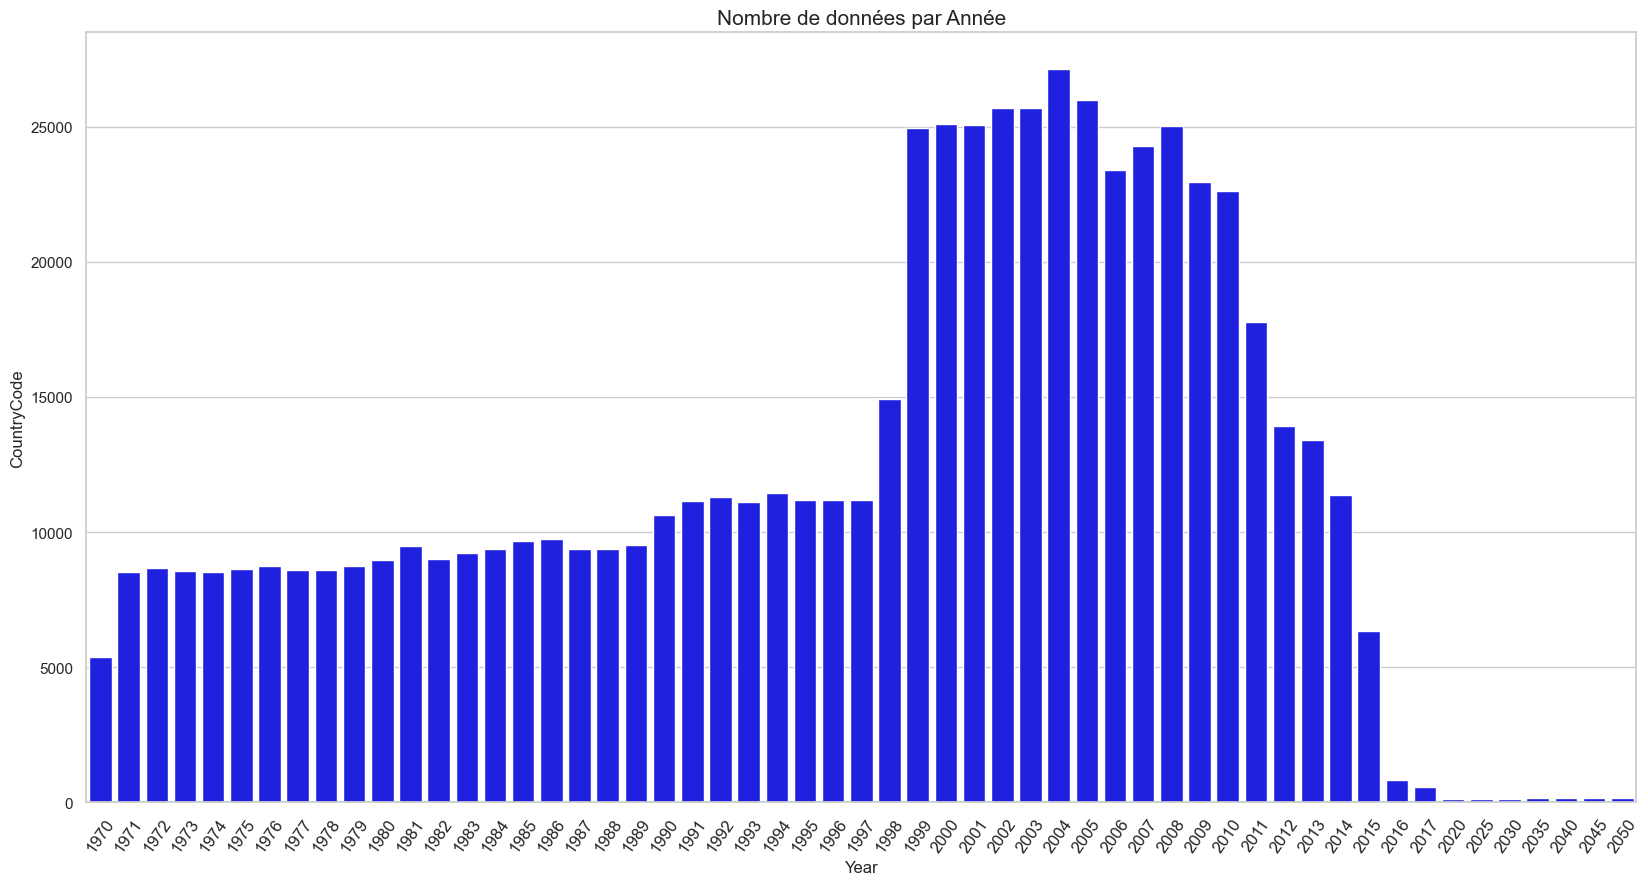

In [167]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
plt.title('Nombre de données par Année', size=15)
#plot = sns.barplot(y = 'CountryCode', x='Year', data = Footnote.groupby('Year').count().reset_index())
plot = sns.barplot(y='CountryCode', x='Year', data=Footnote.groupby('Year').count().reset_index(), color='blue')

plot.set_xticklabels(labels = Footnote.groupby('Year').count().reset_index()['Year'], rotation=55, size=12)

#sns.barplot(x=[elem1 for elem1, elem2 in mots_indicateurs_populaires], y=[elem2 for elem1, elem2 in mots_indicateurs_populaires], hue = 'mots')
plt.show()

# <a name="C6">P3C5 - Comprenez les mesures de dispersion</a>

Pour calculer la variance en Python, cela se fait très facilement ! Il suffit d'utiliser la méthode .var() sur la variable considérée. Par exemple avec la variable montant :

# <a name="C7"> P3C6 - Appréhendez les mesures de forme</a>

Le calcul du skewness se fait très facilement en Python :

# <a name="C8">P3C7 - Familiarisez-vous avec les mesures de concentration</a>

Voici le code permettant d'afficher la courbe de Lorenz :

# <a name="C9"> P4C3 - Analysez la corrélation entre deux variables quantitatives</a>

# <a name="C10"> P4C4 - Analysez deux variables quantitatives par régression linéaire</a>

Tout d'abord, il faut calculer la variable attente ! Voici le code permettant de créer cela :

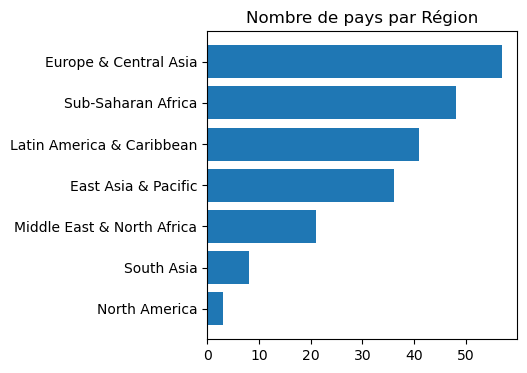